In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../../../')
import set_plot_sizes

sys.path.append('../../../../../cosmosis_wrappers/') # change to correct path
import ABC_saved_sims_multiparam

from tqdm import tqdm_notebook as tqdm

# change to the path where ABCPMC git clone is located
sys.path.insert(0,'../../../../../../abcpmc/')
import abcpmc # find citation at https://github.com/jakeret/abcpmc

sys.path.append('../../../../../latinhypercube/') # change to correct path
import generate_hypercube

import corner

In [2]:
data_dir = './'

In [20]:
!pwd 
!ls

/net/reusel/data1/osinga/master_research_project/master_research_project/learning_purposes/v2_IMNN/weak_lensing_multibins/2param/sigma8
 ABC_3_1D.png			      Models
 ABC_3_2D.png			      modelsettings.csv
 c_ell_IMNN_3bins_2param_ellbins.py   networkoutput1_10000.png
 c_ell_IMNN_3bins_2param.py	      networkoutput1.png
 fid_sims.npy			      networkoutput2_10000.png
 fid_summaries.npy		      networkoutput2.png
 Figures			      output_fid.png
 fit_latin_hypercube.ipynb	      output.png
 fit_output_summaries.ipynb	      preloaded_data_sigma8
 fit_output_summaries.pdf	      realsummary.npy
 History			      summaries_lhs.png
 hypercube			      TestFigures
'ize=draws)'			      theta_lhd.npy
 lhd_Cls.npy			      x1vsx2.png
 lhd_summaries.npy


In [8]:
class holder(object):
    """Small class because plotting function requires it"""
    def __init__(self,saveversion,figuredir):
        self.modelversion = saveversion
        self.figuredir = figuredir
        

holder1 = holder(saveversion=5,figuredir='./hypercube/')
theta_fid = np.array([0.315,0.811]) # Omega_M, sigma8

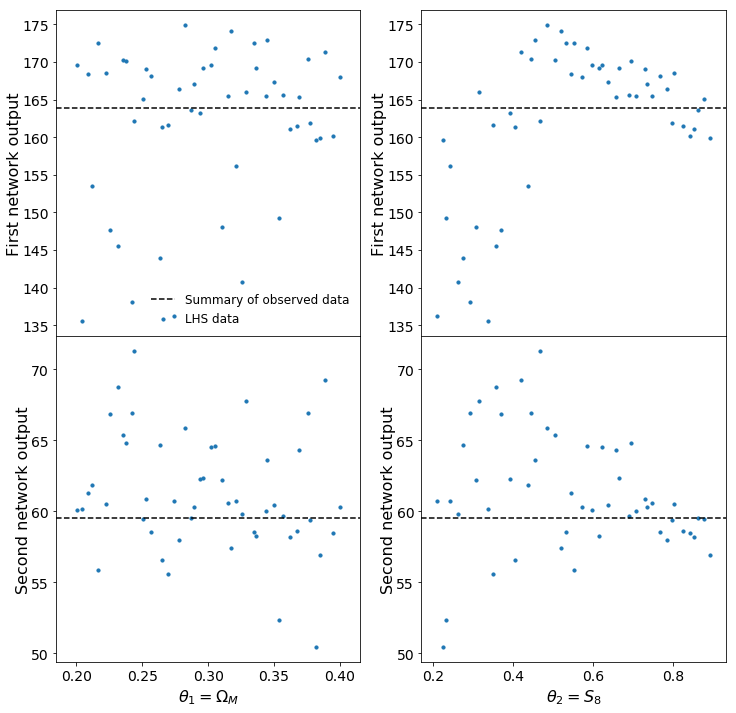

In [40]:
# I generated 50 samples, for 2 params
# with criterion = 'maximin'
# using uniform for Omega_m between 0.2 and 0.4
# and uniform for S8 between 0.7 and 0.9

# The parameters according to lhs
theta_lhd = np.load('./theta_lhd.npy')
# The Cells
lhd_Cls = np.load('./lhd_Cls.npy')

# The fisher info on the real data
# fisher = np.load('./realfisher')

# The summaries
summaries = np.load('./lhd_summaries.npy')
realsummary = np.load('./realsummary.npy')
# Plot the summaries
generate_hypercube.plot_hypercube_summaries(theta_lhd, summaries
    , holder1, theta_fid, realsummary, oneD=True, hbins=20
    , show=True)



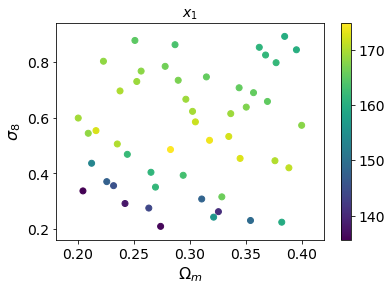

In [10]:
num = 50 # number of points to plot
plt.scatter(theta_lhd[:num,0],theta_lhd[:num,1]
            ,c=summaries[:num,0]);
plt.title("$x_1$")
plt.colorbar()
plt.xlabel('$\Omega_m$');
plt.ylabel('$\sigma_8$')
# plt.legend(frameon=False);
plt.show()

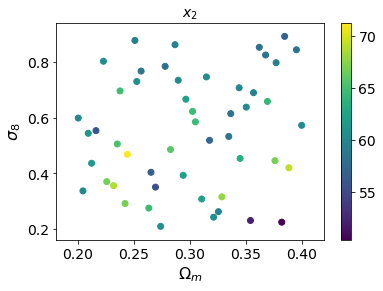

In [12]:
num = 50 # number of points to plot
plt.scatter(theta_lhd[:num,0],theta_lhd[:num,1]
            ,c=summaries[:num,1]);
plt.title("$x_2$")
plt.colorbar()
plt.xlabel('$\Omega_m$');
plt.ylabel('$\sigma_8$')
# plt.legend(frameon=False);
plt.show()

Seems like it will be hard to fit x1 and x2 with a plane. x2 even harder.

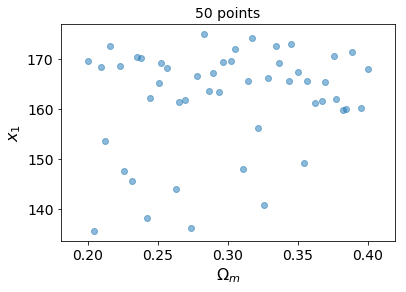

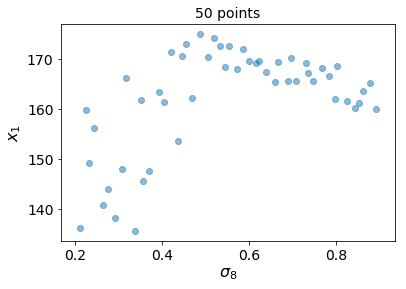

In [13]:
num = 50
plt.title(f"{num} points")
plt.scatter(theta_lhd[:num,0], summaries[:num,0],alpha=0.5)
plt.xlabel('$\Omega_m$');
plt.ylabel('$x_1$')
plt.show()

plt.title(f"{num} points")
plt.scatter(theta_lhd[:num,1], summaries[:num,0],alpha=0.5)
plt.xlabel('$\sigma_8$');
plt.ylabel('$x_1$')
plt.show()

In [14]:
def linleastsquares(X, y):
    """
    Fit linear least squares, given a matrix X
    X = shape (observations,num_params) (1000,2)
    y = observed data values -- shape = (1000,)
    
    returns beta -- best fit parameters -- shape (2,)
    """
    beta = np.dot((np.dot( np.linalg.inv(np.dot(X.T,X)), X.T)),y)   
    return beta

In [25]:
def plot_fit_result(model,xindx):
    """
    Plot a few images to show how well the model fits the data
    
    model -- function: the best fit model, should take two parameters: Omega_m and sigma_8
    xindx -- integer:  1 for fitting x1. 2 for fitting x2
    
    """
    # Calculate values according to the model
    omega_m = np.linspace(0.28,0.34,30)
    sigma_8 = np.linspace(0.70,0.90,30)
    xv, yv = np.meshgrid(omega_m, sigma_8)
    model_sol = model(xv,yv)

    plt.contourf(omega_m,sigma_8, model_sol);
    plt.title(f"Fit to $x_{xindx}$")
    plt.colorbar()
    plt.xlabel('$\Omega_m$');
    plt.ylabel('$\sigma_8$')
    # plt.legend(frameon=False);
    plt.show()

    # color boundaries hardcoded
    if xindx == 1:
        vmin = None
        vmax = None
    if xindx == 2:
        vmin = None
        vmax = None
    
    num = 1000
    model_sol_scatter = model(theta_lhd[:num,0],theta_lhd[:num,1])
    plt.scatter(theta_lhd[:num,0],theta_lhd[:num,1], c=model_sol_scatter
                ,vmin=vmin,vmax=vmax);
    plt.title(f"Fit to $x_{xindx}$")
    plt.colorbar()
    plt.xlabel('$\Omega_m$');
    plt.ylabel('$\sigma_8$')
    # plt.legend(frameon=False);
    plt.show()

    plt.scatter(theta_lhd[:num,0],theta_lhd[:num,1],c=summaries[:num,xindx-1]
                ,vmin=vmin,vmax=vmax);
    plt.title(f"Actual $x_{xindx}$")
    plt.colorbar()
    plt.xlabel('$\Omega_m$');
    plt.ylabel('$\sigma_8$')
    # plt.legend(frameon=False);
    plt.show()
    
def plot_fit_result1D(model,xindx):
    """
    Plot a few images in 1D to show how well the model fits the data
    
    model -- function: the best fit model, should take two parameters: Omega_m and sigma_8
    xindx -- integer:  1 for fitting x1. 2 for fitting x2
    
    """
    num = 50
    model_sol_scatter = model(theta_lhd[:num,0],theta_lhd[:num,1])
    plt.title(f"{num} points")
    plt.scatter(theta_lhd[:num,0], model_sol_scatter,alpha=0.5)
    plt.xlabel('$\Omega_m$');
    plt.ylabel(f'$x_{xindx}$')
    plt.show()

    plt.title(f"{num} points")
    plt.scatter(theta_lhd[:num,1], model_sol_scatter,alpha=0.5)
    plt.xlabel('$\sigma_8$');
    plt.ylabel(f'$x_{xindx}$')
    plt.show()

In [26]:
# Fit to the 50 points
num = 50
# Fit x1 = a\Omega_m + b\sigma_8 + c
X = np.array([theta_lhd[:num,0], theta_lhd[:num,1], np.ones(num)]).T # (1000,3)
y = summaries[:num,0] # x1

ahat, bhat, chat = linleastsquares(X,y)
print ("My lstsq prediction:")
print (ahat,bhat, chat)


# Scipy values
# Residual function:
def resid(x, t, y):
    """
    x is in this case [a, b, c], the fitted model params
    t is in this case [Omega_m, sigma8, ones] (X array, 1000,3)
    y is in this case the real values, y (1000,)
    """
    predict = x[0]*t[:,0]+x[1]*t[:,1]+x[2]
    actual = y
    return predict - actual

from scipy.optimize import least_squares
x0 = np.ones(3) # initial estimate for ahat, bhat, chat
reslsq = least_squares(resid, x0, args=(X,y))
print ("Scipy lstsq:")
print (reslsq.x)
print ("We see that this is equivalent to linear least squares")
print ("That we have implemented")

My lstsq prediction:
19.65612943763483 26.131060112673588 141.84055843341065
Scipy lstsq:
[ 19.65612788  26.13106105 141.8405584 ]
We see that this is equivalent to linear least squares
That we have implemented


In [27]:
# Now do better, with a more robust loss function
# f_scale is now of crucial importance. It defines the soft margin
# between inlier and outlier residuals. 
# e.g., f_scale=1 means that outlier residuals are < 0.1.

# Don't know what value we should set for f_scale though
# so should probably experiment

f_scales = [0.1, 1, 10]

for f_scale in f_scales:

    resrobust = least_squares(resid, x0, loss='cauchy', f_scale=f_scale
                              ,args=(X,y))
    ahatsp, bhatsp, chatsp = resrobust.x
    print ("Scipy with cauchy loss:")
    print (ahatsp, bhatsp, chatsp)


    resrobust = least_squares(resid, x0, loss='soft_l1', f_scale=f_scale
                              ,args=(X,y))
    ahatsp, bhatsp, chatsp = resrobust.x
    print ("Scipy with soft_l1 loss:")
    print (ahatsp, bhatsp, chatsp)

Scipy with cauchy loss:
26.63441862643729 48.64237229167005 123.56611314713506
Scipy with soft_l1 loss:
-6.278312987426135 14.666810802837917 158.03951953544973
Scipy with cauchy loss:
58.91948576372889 46.69097277341996 117.16520456573939
Scipy with soft_l1 loss:
-2.291763736561855 15.567018333570347 156.12294631073203
Scipy with cauchy loss:
-2.3980543990771137 15.367344432744488 156.19569266712207
Scipy with soft_l1 loss:
12.731008230940944 22.656582243766465 146.4570325189153


Parameters are very different...

In [28]:
model = lambda x, y: ahat*x + bhat*y + chat

# lets use soft l1
model_sp = lambda x, y: ahatsp*x + bhatsp*y + chatsp

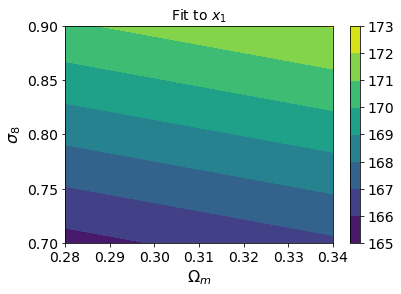

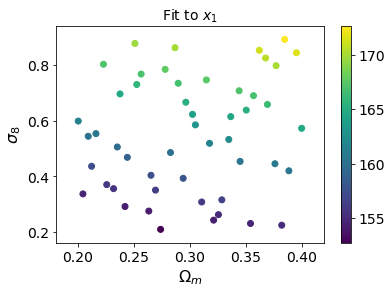

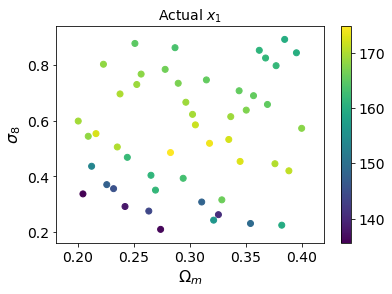

Scipy values


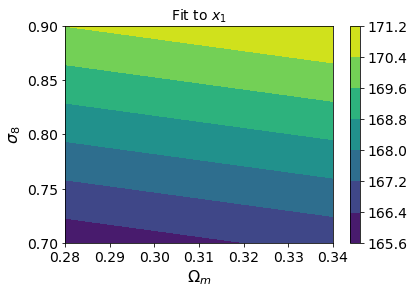

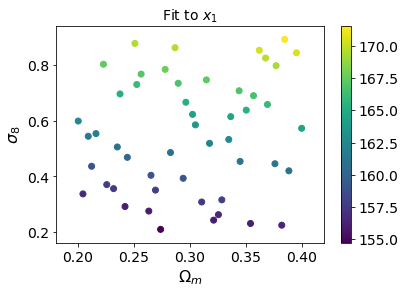

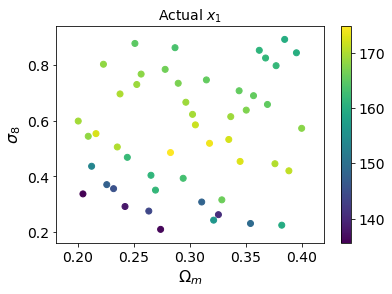

In [29]:
plot_fit_result(model,xindx=1)
print ("Scipy values")
plot_fit_result(model_sp,xindx=1)

#### I think the fit is bad.

In [30]:
# Fit to x2, same procedure
num = 50
# Fit x1 = a\Omega_m + b\sigma_8 + c
X = np.array([theta_lhd[:num,0], theta_lhd[:num,1], np.ones(num)]).T # (1000,3)
y2 = summaries[:num,1] # x2

ahat2, bhat2, chat2 = linleastsquares(X,y2)
print (ahat2,bhat2, chat2)

-13.83428430754077 -3.112448100001032 67.1006344119898


In [31]:
# Now do better, with a more robust loss function
# f_scale is now of crucial importance. It defines the soft margin
# between inlier and outlier residuals. 
# e.g., f_scale=1 means that outlier residuals are < 0.1.

# Don't know what value we should set for f_scale though
# so should probably experiment

f_scales = [0.1, 1, 10]
f_scales = [1]

for f_scale in f_scales:

    resrobust = least_squares(resid, x0, loss='cauchy', f_scale=f_scale
                              ,args=(X,y2))
    ahat2sp, bhat2sp, chat2sp = resrobust.x
    print ("Scipy with cauchy loss:")
    print (ahat2sp, bhat2sp, chat2sp)


    resrobust = least_squares(resid, x0, loss='soft_l1', f_scale=f_scale
                              ,args=(X,y2))
    ahat2sp, bhat2sp, chat2sp = resrobust.x
    print ("Scipy with soft_l1 loss:")
    print (ahat2sp, bhat2sp, chat2sp)

Scipy with cauchy loss:
-6.855292392262014 -5.143345269655405 65.78992560247949
Scipy with soft_l1 loss:
-8.488685792264661 -5.231123004573969 66.49776649642442


We see that this does change the values significantly.

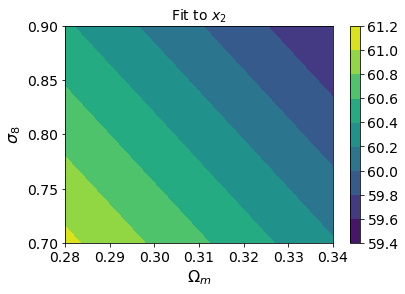

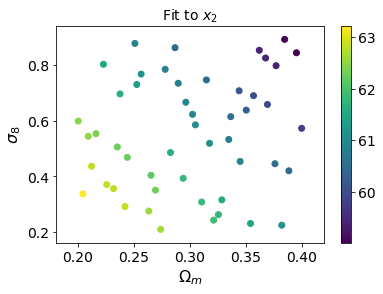

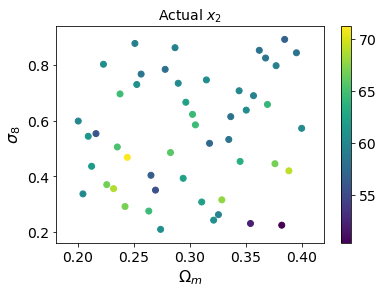

Scipy fit


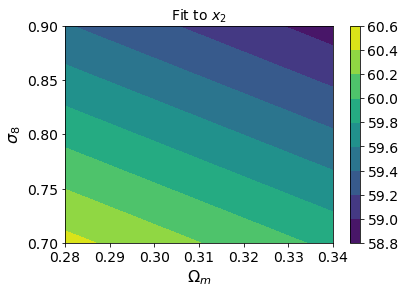

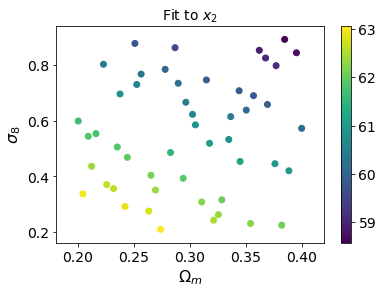

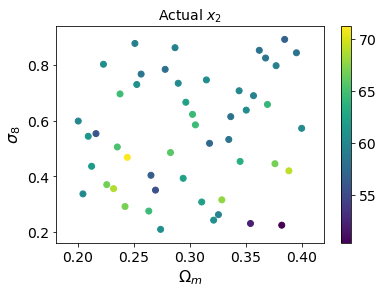

In [32]:
model2 = lambda x, y: ahat2*x + bhat2*y + chat2
plot_fit_result(model2,xindx=2)

model2_sp = lambda x, y: ahat2sp*x + bhat2sp*y + chat2sp
print ("Scipy fit")
plot_fit_result(model2_sp,xindx=2)

#### Now perform ABC with the function that generates x1 and x2, no cosmosis needed.

In [35]:
import tensorflow as tf
# change to the path where the IMNN git clone is located
# new version of IMNN by Tom
sys.path.insert(-1,'../../../../../../IMNNv2/IMNN/')
import IMNN.ABC.priors as priors

In [36]:
def output_summaries(theta,model1,model2):
    """
    Return x1,x2 for a given theta = list of [Omega_m, sigma_8]'s' 
    given the two fitted models to x1 x2
    """
    theta = np.array(theta)
    Omega_m = theta[:,0]
    sigma_8 = theta[:,1]
    x1 = model1(Omega_m,sigma_8)
    x2 = model2(Omega_m,sigma_8)
    
    return np.array([x1,x2]).T # return as array of shape (len(theta),2)

In [37]:
def ABC_with_model(draws, real_summary, prior, model1, model2, fisher):

    Gaussprior = priors.TruncatedGaussian(prior["mean"],prior["variance"],prior["lower"]
                                    ,prior["upper"])
    # Draw params from Gaussian prior
    theta = Gaussprior.draw(draws)
    # Calculate summaries with models
    summaries = output_summaries(theta, model1,model2)
    # Calculate distance
    differences = summaries - real_summary
    distances = np.sqrt(
        np.einsum(
            'ij,ij->i',
            differences,
            np.einsum(
                'jk,ik->ij',
                fisher,
                differences)))
    ABC_dict = dict()
    ABC_dict["summary"] = real_summary
    ABC_dict["fisher"] = fisher
    ABC_dict["parameters"] = theta
    ABC_dict["summaries"] = summaries
    ABC_dict["differences"] = differences
    ABC_dict["distances"] = distances
    
    return ABC_dict
    

In [38]:
# Variables for ABC
draws = int(1e5) # amount of draws
# A Truncated gaussian prior
prior = {'mean': np.array([0.30,0.805]),
         'variance': np.array([[0.01,0],[0,0.01]]), # cov matrix
         'lower': np.array([0.0,0.4]),
         'upper': np.array([1.0,1.2]) 
         }

NameError: name 'abc' is not defined

In [98]:
abc_model = ABC_with_model(draws, realsummary, prior, model, model2, fisher)

# Also do scipy values
abc_modelsp = ABC_with_model(draws, realsummary, prior, model_sp, model2_sp, fisher)

Epsilon is chosen to be 80.00
Number of accepted samples =  3379


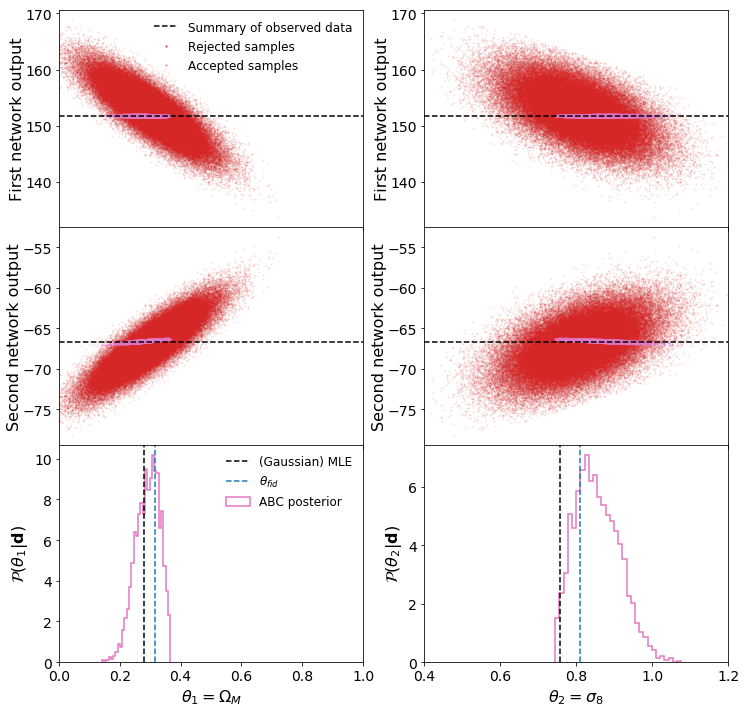

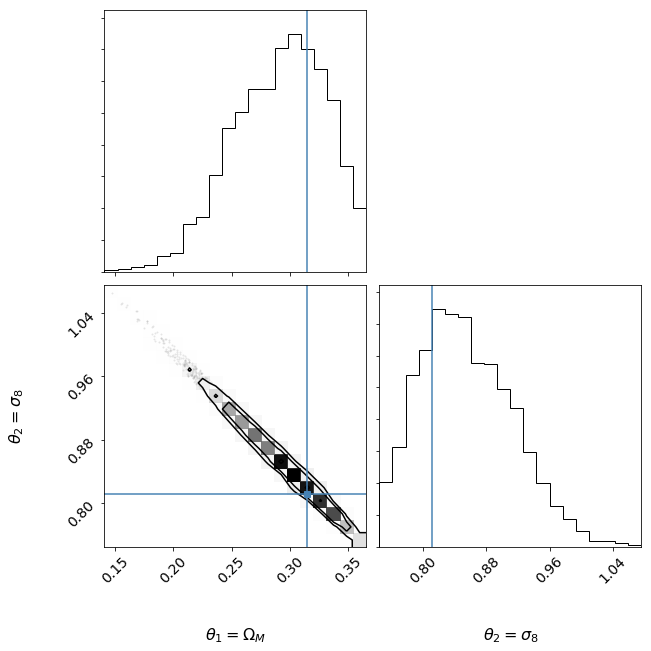

In [99]:
class holder(object):
    """Small class because plotting function requires it"""
    def __init__(self,saveversion,figuredir):
        self.modelversion = saveversion
        self.figuredir = figuredir
        

holder1 = holder(saveversion=3,figuredir='./')
theta_fid = np.array([0.315, 0.811])
# plotting function requires this too, does not depend on model fitting though, so steal from earlier abc
abc_model["MLE"] = abc["MLE"]
ABC_saved_sims_multiparam.plot_ABC_2params(abc_model, holder1, theta_fid, prior, oneD='both'
                                           , hbins=30, epsilon=80,show=True)

Epsilon is chosen to be 80.00
Number of accepted samples =  2705


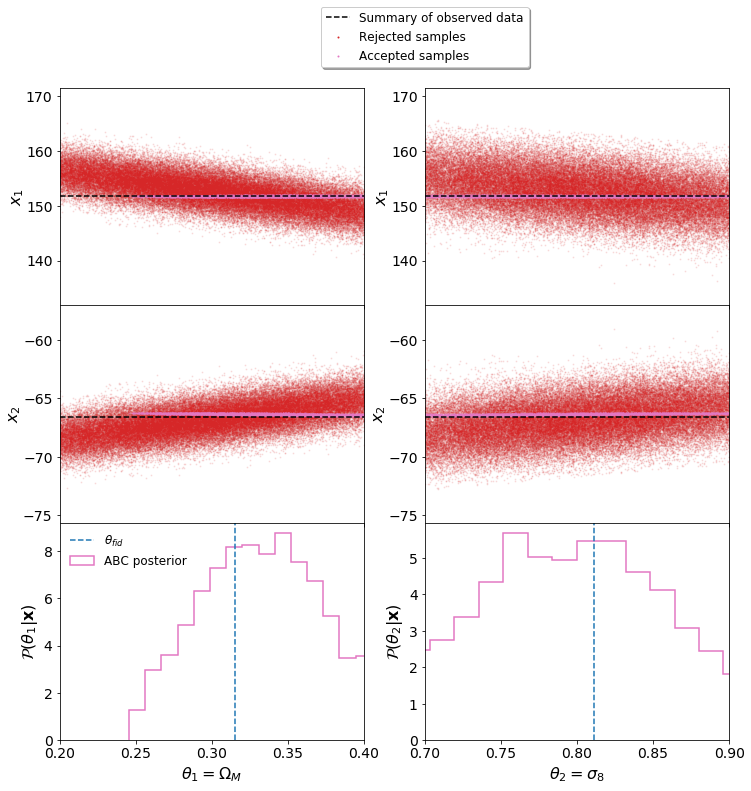

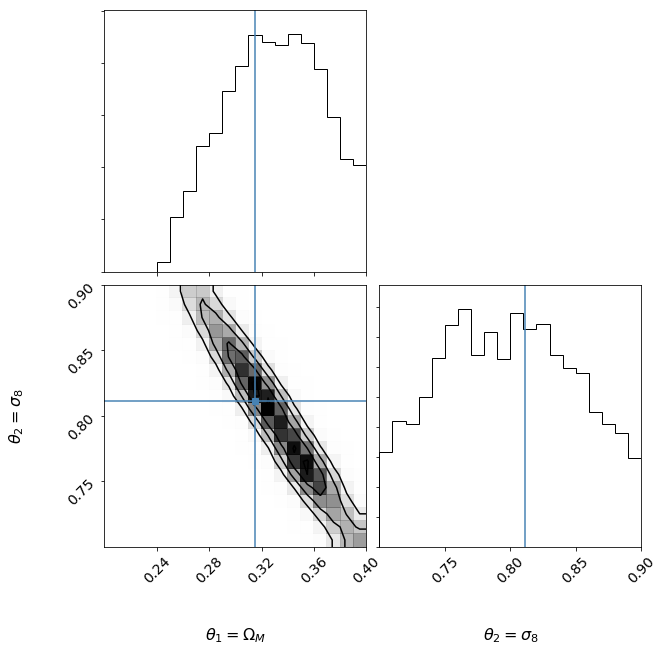

In [110]:
# Also for the scipy model
holder1 = holder(saveversion=3,figuredir='./')
theta_fid = np.array([0.315, 0.811])
# plotting function requires this too, does not depend on model fitting though, so steal from earlier abc
abc_modelsp["MLE"] = abc["MLE"]

prior = {'mean': np.array([0.30,0.805]),
         'variance': np.array([[0.01,0],[0,0.01]]), # cov matrix
         'lower': np.array([0.20,0.70]),
         'upper': np.array([0.40,0.90]) 
         }

# epsilon = 80
ABC_saved_sims_multiparam.plot_ABC_2params(abc_modelsp, holder1, theta_fid, prior, oneD='both'
                                           , hbins=30, epsilon=80,show=True)


In [106]:
from importlib import reload

In [103]:
reload(ABC_saved_sims_multiparam)

<module 'ABC_saved_sims_multiparam' from '../../../../../cosmosis_wrappers/ABC_saved_sims_multiparam.py'>